In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Import data**

In [2]:
df = pd.read_excel('Fire.xlsx')

In [3]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [5]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


**Convert type column 'FUEL' to int**

In [6]:
df['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [7]:
df['FUEL'] = pd.Categorical(df['FUEL']).codes

**Split data to x and y**

In [12]:
y = df.pop('STATUS')
x = df.copy()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=1)

**Model**

In [52]:
from tensorflow.keras import Sequential
from keras import layers
from keras.utils.vis_utils import plot_model

model = Sequential()

model.add(layers.Input(shape=(6,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                70        
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 0.6865 - accuracy: 0.7925 - val_loss: 0.5016 - val_accuracy: 0.8338
Epoch 2/100
175/175 [==============================] - 0s 831us/step - loss: 0.4143 - accuracy: 0.8536 - val_loss: 0.3856 - val_accuracy: 0.8538
Epoch 3/100
175/175 [==============================] - 0s 843us/step - loss: 0.3344 - accuracy: 0.8662 - val_loss: 0.3204 - val_accuracy: 0.8656
Epoch 4/100
175/175 [==============================] - 0s 918us/step - loss: 0.2965 - accuracy: 0.8721 - val_loss: 0.2910 - val_accuracy: 0.8653
Epoch 5/100
175/175 [==============================] - 0s 819us/step - loss: 0.2844 - accuracy: 0.8733 - val_loss: 0.2967 - val_accuracy: 0.8696
Epoch 6/100
175/175 [==============================] - 0s 898us/step - loss: 0.2704 - accuracy: 0.8791 - val_loss: 0.2956 - val_accuracy: 0.8703
Epoch 7/100
175/175 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.8803 - val_loss: 0.2732 - val_accura

In [55]:
model.evaluate(x_test, y_test)

110/110 [==============================] - 0s 723us/step - loss: 0.2426 - accuracy: 0.8928


[0.24262398481369019, 0.8928059339523315]

**Model evaluation**

(0.0, 1.0)

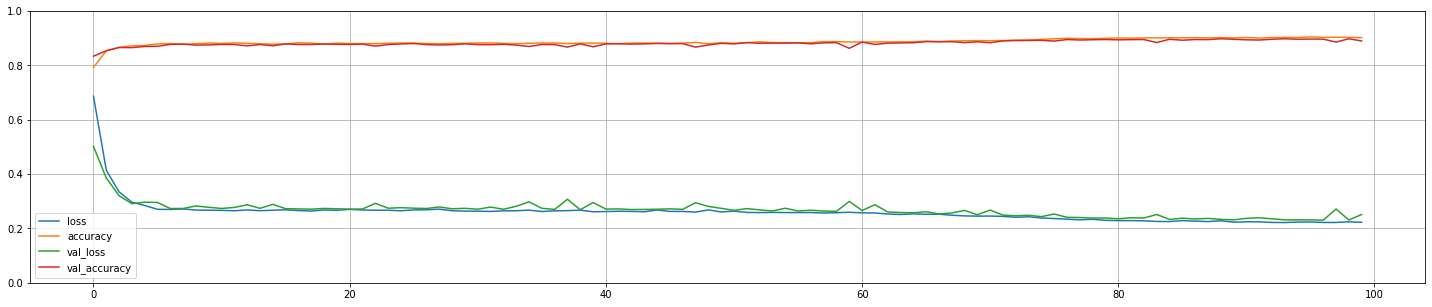

In [56]:
pd.DataFrame(history.history).plot(figsize=(25,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

<AxesSubplot:>

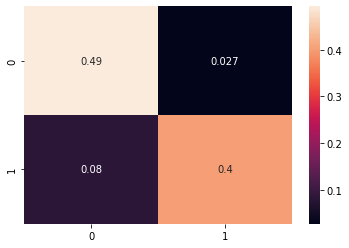

In [58]:
from sklearn.metrics import confusion_matrix

y_true = np.array(y_test).reshape([len(y_test), 1])
y_pred = [1 if x>.5 else 0 for x in model.predict(x_test)]

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm/np.sum(cm), annot=True)